# AIRCRAFT RISK ANALYSIS



## OVERVIEW
This project analyzes aviation accidents from the National Transportation Safety Board, covering icidents and accidents from 1962 to 2023.
The goal is to identify low risk aircraft model that the company can consider for purchase as it ventures to commercial and private entrprise by
filtering, sorting, grouping, aggregatting data, we extract insight for safe and strategic decision making of aircraft acquisiotion. 

## BUSINESS PROBLEM
The company is entering the aviation industry. However, they lack insight into the historical safety performance of different aircraft.
The goal of this analysis is to identify aircraft with low accidents, considering factors 
and provide recommendations on the safest and suitable aircraft for private and commercial operations    

## DATA UNDERSTANDING
The dataset comes from National Transportation Safety Board(NTSB) and contains aviation accidents and incidents from 1962 to 2023.
the dataset contain information on:
                               1. 'Event'.'Date': Date of the incident,accident
                               2. 'Make', 'Model': manufacturer and aircraft model
                               3. 'Injury Severity' : Fatal, Serious, minor injuries
                               4. 'Total Fatal Injuries', 'Total serious Injuries', 'Total Minor Injuries', 'Total Uninjered'
                               5. 'Purpose of flight': Purpose such as business, personal
                               6. 'Weather condition'
                               7. 'Broad phase of flight' : such as Takeoff, cruise, landing...
                               8. 'Aircraft damage': extent of damage of the the aircraft
                               9. 'Engine Type', ''Number of Engines'

The key measure variables used are:
                               1. 'Total.Fatal.Injuries': accidents that caused death
                               2. 'Total.serious.Injuries' : accidents that caused servier injuries
                               3. 'Total.Minor.Injuries' : accidents that caused minor injuries
                               4. 'Total.Uninjered' : accidents that did not cause injuries


## Data cleaning steps

                    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("~/Desktop/Phase 1 Project/data/AviationData.csv", encoding = "ISO-8859-1",low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(88889, 31)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#dropping columns that are mostly empty and irrelevant
df.drop(columns=[
    'Event.Id','Accident.Number','Airport.Name','Airport.Code',
    'Latitude','Longitude','Registration.Number','FAR.Description',
    'Schedule','Air.carrier','Report.Status','Publication.Date',
    'Country'], inplace = True)


In [7]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [8]:
# filling missing values in the (['Total Fatal Injuries'],['Total Serious Injuries'],['Total Minor Injuries'],['Total Uninjered']) columns with 0
df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']] = df[
['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].fillna(0)
df

,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,2022-12-26,"Hampton, NH",NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,2022-12-26,"Payson, AZ",Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,2022-12-26,"Morgan, UT",NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [34]:
# DATA CLEANING 
# Filling NaN values with UNKNOWN in the relevant columns

df["Model"] = df["Model"].fillna("Unknown").str.upper()
df["Make"] = df["Make"].fillna("Unknown").str.upper()
df["Make_Model"] = df["Make"].str.upper().str.strip()+ " " +df["Model"].str.upper().str.strip()
df["Aircraft.damage"]=df["Aircraft.damage"].fillna("Unknown").str.upper().str.strip()

Text(0, 0.5, 'Aircraft Make')

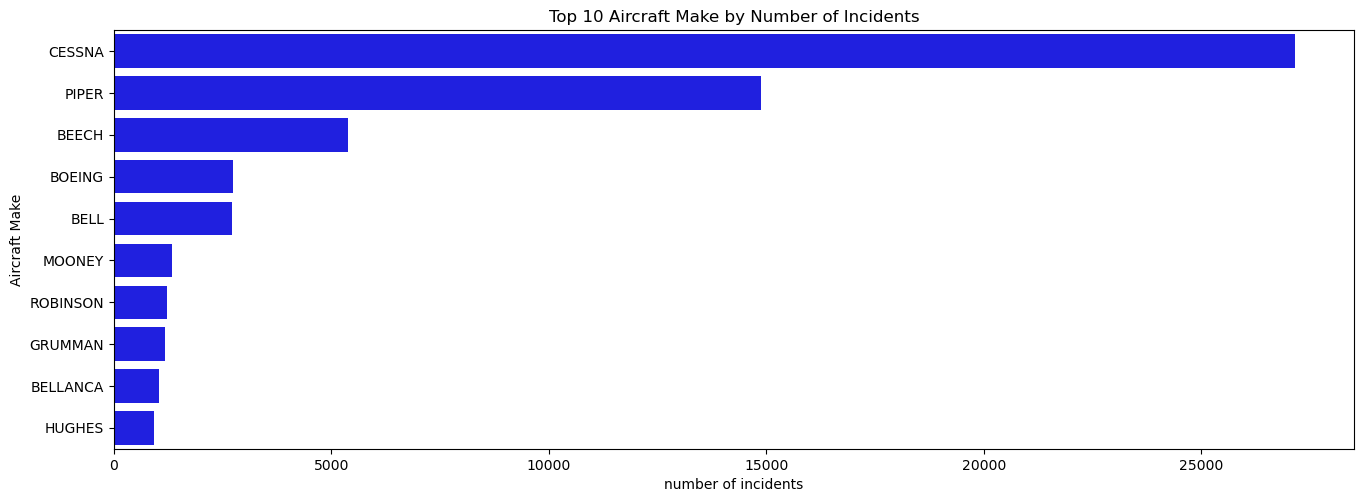

In [33]:
# Top 10 aircraft makes by number of Accidents

plt.figure(figsize=(16,25))
plt.subplot(4,1,1)
Top_aircraft_make = df["Make"].value_counts().head(10)
sns.barplot(x=Top_aircraft_make.values, y=Top_aircraft_make.index, color = "blue")
plt.title("Top 10 Aircraft Make by Number of Incidents")
plt.xlabel("number of incidents")
plt.ylabel("Aircraft Make")
           

Text(0, 0.5, 'Aircraft Make + Model')

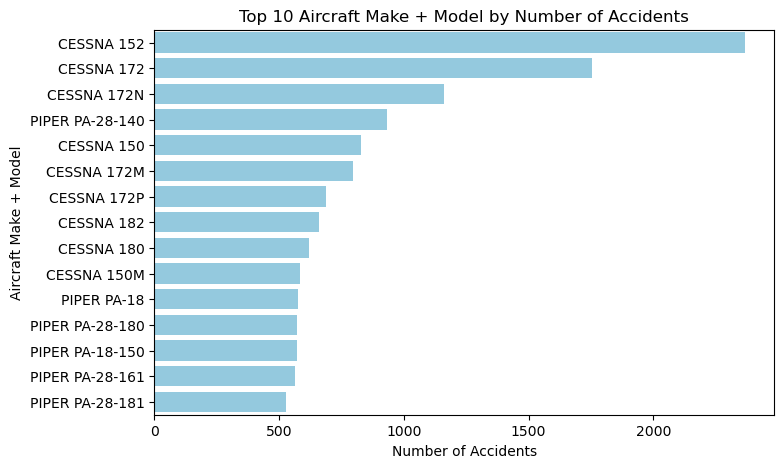

In [27]:
# Top 10 most common make_model combined
top_make_model = df["Make_Model"].value_counts().head(15)

#ploting top 10 [Make_Model]
plt.figure(figsize=(8,5))
sns.barplot(x=top_make_model.values, y=top_make_model.index,color="skyblue")
plt.title("Top 10 Aircraft Make + Model by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make + Model") 

Text(0, 0.5, 'Aircraft Make')

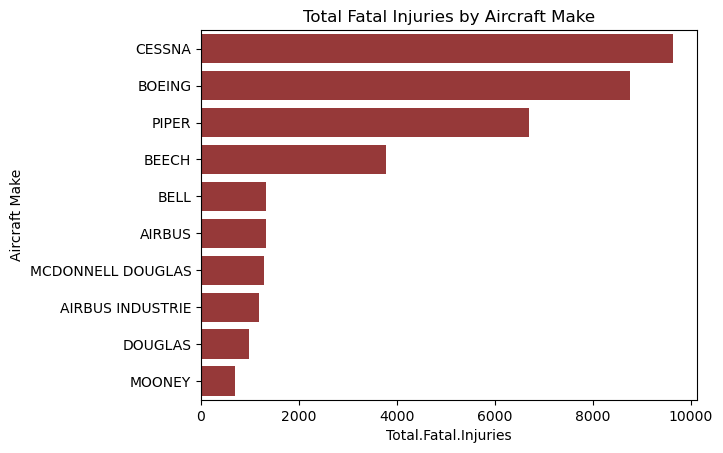

In [29]:
# Fatality rate by make

fatality_by_make = df.groupby("Make")["Total.Fatal.Injuries"].sum().sort_values(ascending = False).head(10)
sns.barplot(x=fatality_by_make.values, y=fatality_by_make.index, color ="brown")
plt.title("Total Fatal Injuries by Aircraft Make")
plt.xlabel("Total.Fatal.Injuries")
plt.ylabel("Aircraft Make")

In [ ]:
# Aircraft damaged by make_model

df["Aircraft.damage"]=df["Aircraft.damage"]=df["Aircraft.damage"].fillna("Unknown").str.upper().str.strip()
           